In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-stock-prices-since-the-pandemic-started/stock_prices.csv
/kaggle/input/nyse/prices-split-adjusted.csv
/kaggle/input/nyse/fundamentals.csv
/kaggle/input/nyse/prices.csv
/kaggle/input/nyse/securities.csv


# Gathering the data

In [2]:
prices = pd.read_csv('/kaggle/input/nyse/prices-split-adjusted.csv')
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
prices.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [4]:
prices.shape

(851264, 7)

In [5]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [6]:
prices['date'] = prices['date'].apply(pd.to_datetime)
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [7]:
#open close columns indicate opening and closing price of stocks per day
#high and low columns are highest/lowest price of a stock on that day
#volume says vol total stocks traded per day

# Visualisation

In [8]:
prices.symbol.value_counts()

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

501 stocks, notice how top trades share the same number

In [9]:
google = prices.loc[prices.symbol == 'GOOG']
google.head()

,date,symbol,open,close,low,high,volume
439,2010-01-04,GOOG,312.304948,312.205308,310.955001,313.580158,3927000.0
907,2010-01-05,GOOG,312.419511,310.830459,309.610028,312.748278,6031900.0
1375,2010-01-06,GOOG,311.761979,302.994813,302.048370,311.761979,7987100.0
1843,2010-01-07,GOOG,303.562685,295.941242,295.218951,303.861575,12876600.0
2311,2010-01-08,GOOG,294.895159,299.886470,293.455551,300.499172,9483900.0


<AxesSubplot:xlabel='date', ylabel='open'>

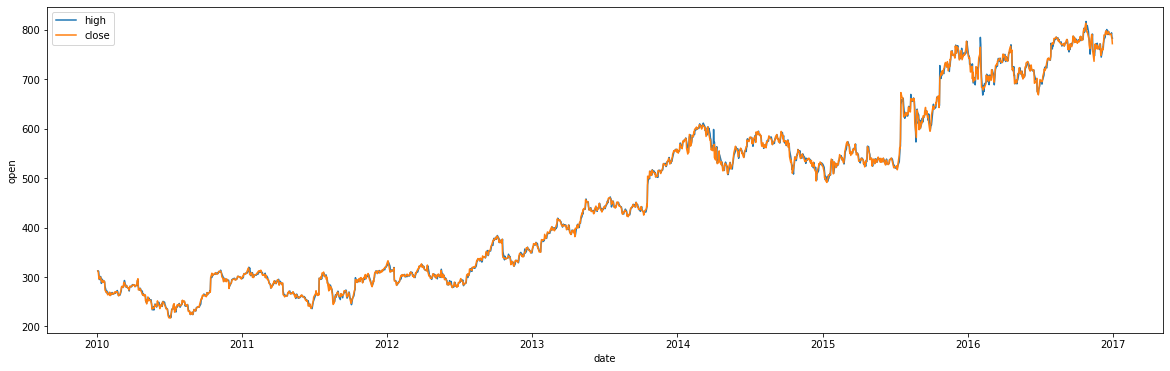

In [10]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data = google, y = 'open', x = 'date', label = 'high')
sns.lineplot(data = google, y = 'close', x = 'date', label = 'close')

Prices have an increasing trend

<AxesSubplot:xlabel='date', ylabel='high'>

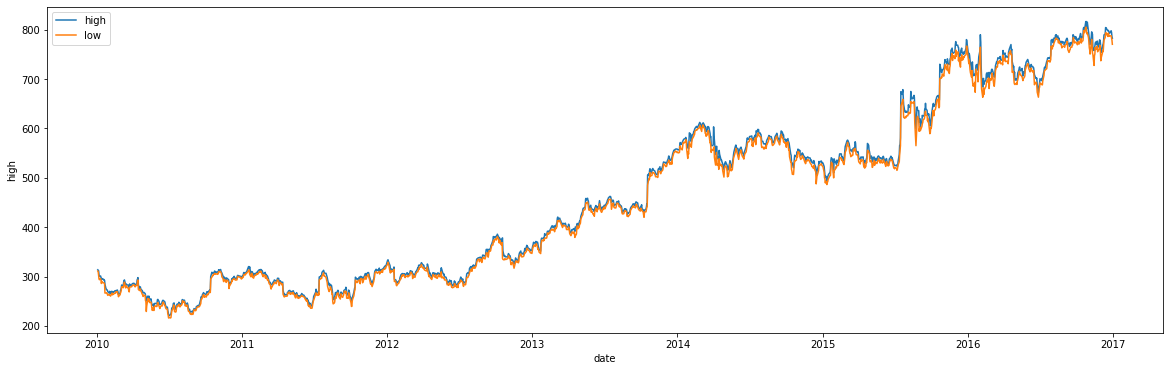

In [11]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data = google, y = 'high', x = 'date', label = 'high')
sns.lineplot(data = google, y = 'low', x = 'date', label = 'low')

<AxesSubplot:xlabel='date', ylabel='volume'>

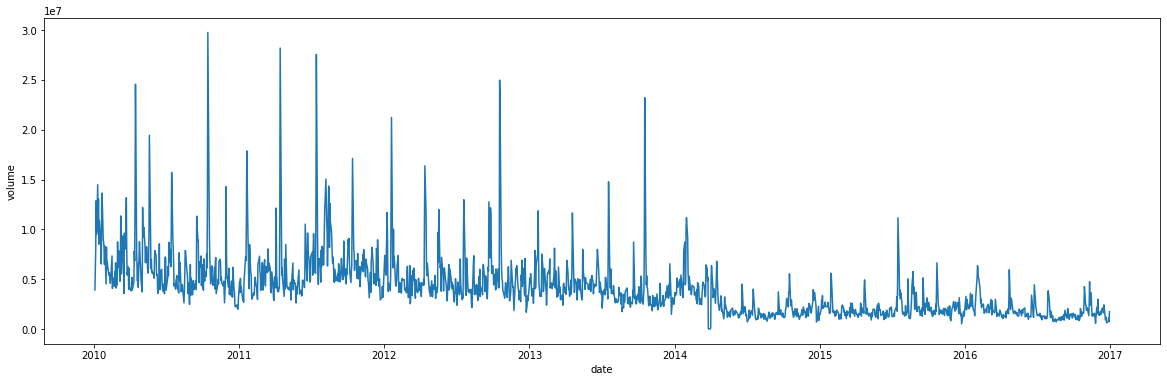

In [12]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data = google, x = 'date', y = 'volume')

Trend slightly decreases

In [13]:
google = google.set_index('date')

<AxesSubplot:xlabel='date'>

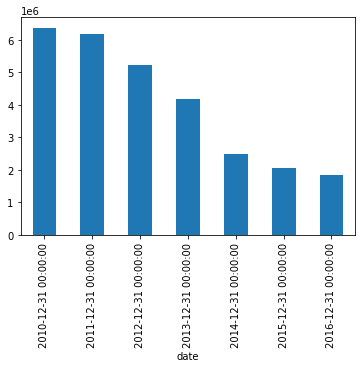

In [14]:
google['volume'].resample('Y').mean().plot.bar()

Stock prices increasing but volume traded decreasing - more people holding on to their (google) stocks.

# Google stocks since COVID

Taking a look at a different dataset about the stocks of Google more recently.

In [15]:
google_covid = pd.read_csv('/kaggle/input/google-stock-prices-since-the-pandemic-started/stock_prices.csv', parse_dates = ['Date'])
google_covid.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-11,62.485001,63.048000,59.803501,60.770500,60.770500,52170000
1,2020-03-12,56.299999,59.693501,55.665001,55.745499,55.745499,84534000
2,2020-03-13,58.950001,60.987999,55.857151,60.986500,60.986500,74002000
3,2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000
4,2020-03-17,54.655499,56.542999,52.800499,55.990002,55.990002,77230000


In [16]:
google_covid.shape

(632, 7)

In [17]:
google_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       632 non-null    datetime64[ns]
 1   Open       632 non-null    float64       
 2   High       632 non-null    float64       
 3   Low        632 non-null    float64       
 4   Close      632 non-null    float64       
 5   Adj Close  632 non-null    float64       
 6   Volume     632 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 34.7 KB


In [18]:
google_covid = google_covid.set_index('Date')

In [19]:
google_covid.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-11,62.485001,63.048000,59.803501,60.770500,60.770500,52170000
2020-03-12,56.299999,59.693501,55.665001,55.745499,55.745499,84534000
2020-03-13,58.950001,60.987999,55.857151,60.986500,60.986500,74002000
2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000
2020-03-17,54.655499,56.542999,52.800499,55.990002,55.990002,77230000


<AxesSubplot:xlabel='Date', ylabel='Volume'>

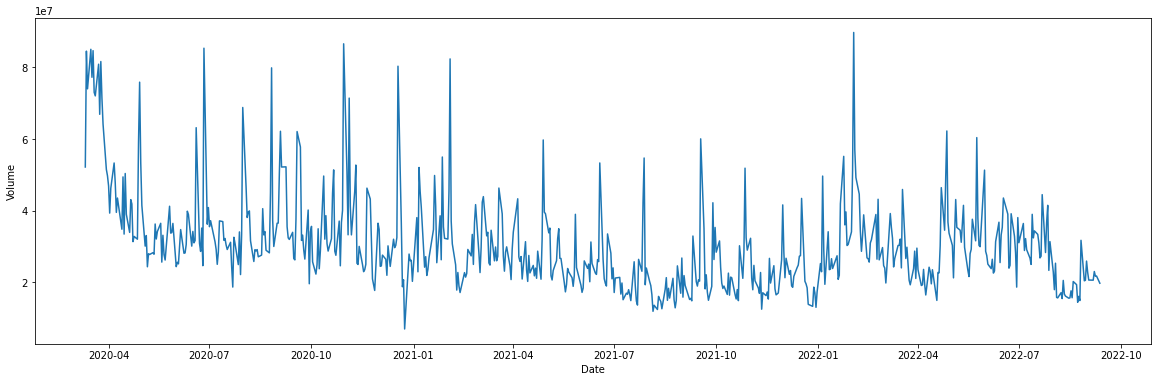

In [20]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data = google_covid, x = 'Date', y = 'Volume')

<AxesSubplot:xlabel='Date'>

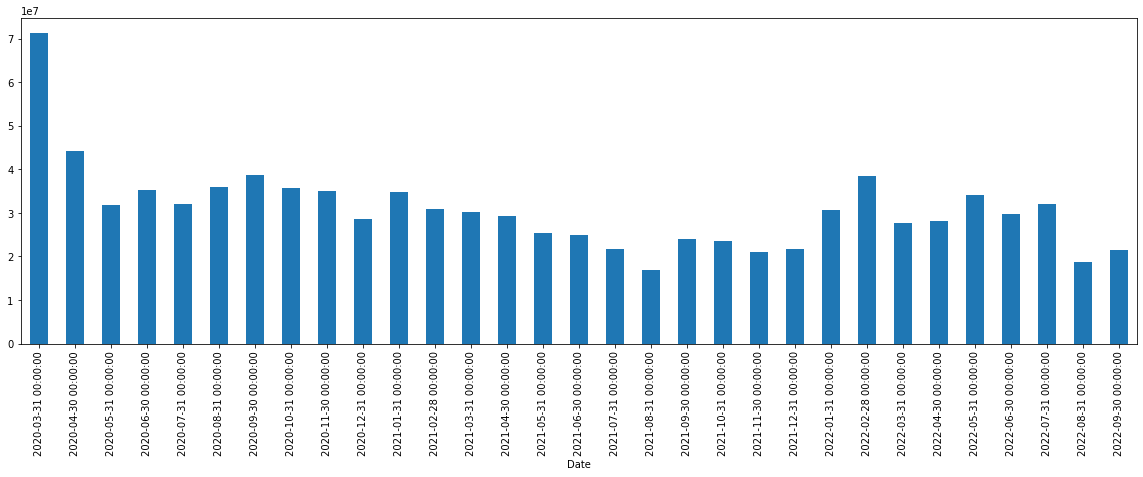

In [21]:
f, ax = plt.subplots(figsize=(20,6))
google_covid['Volume'].resample('M').mean().plot.bar()

<AxesSubplot:xlabel='Date', ylabel='Open'>

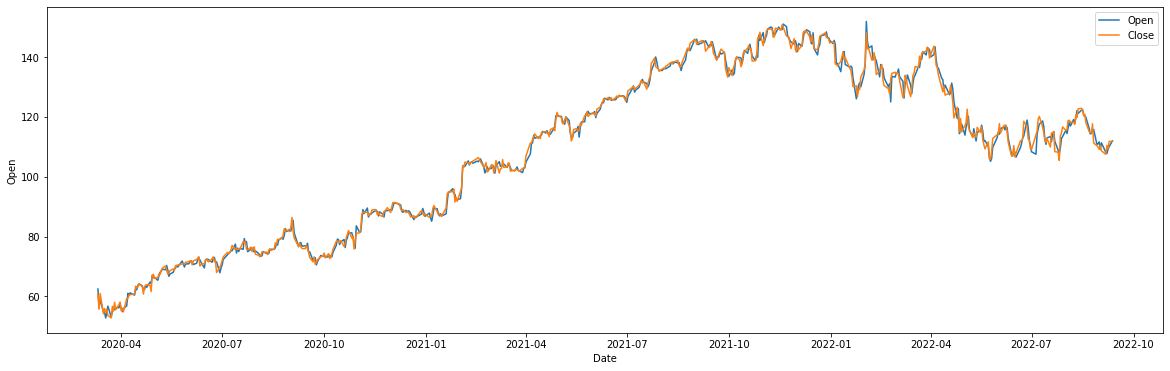

In [22]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data = google_covid, y = 'Open', x = 'Date', label = 'Open')
sns.lineplot(data = google_covid, y = 'Close', x = 'Date', label = 'Close')

<AxesSubplot:xlabel='Date', ylabel='High'>

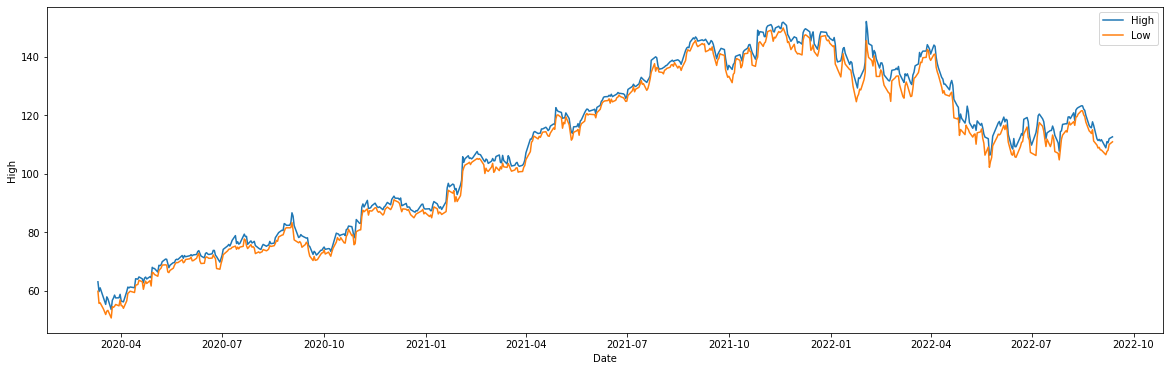

In [23]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data = google_covid, y = 'High', x = 'Date', label = 'High')
sns.lineplot(data = google_covid, y = 'Low', x = 'Date', label = 'Low')

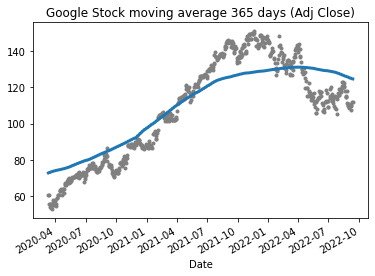

In [24]:
moving_average = google_covid['Adj Close'].rolling(
    window=365,       
    center=True,      
    min_periods=183,  
).mean()
ax = google_covid['Adj Close'].plot(style=".", color="0.5")
moving_average.plot(ax=ax, linewidth=3, title="Google Stock moving average 365 days (Adj Close)", legend=False,);


In [25]:
google_covid['Daily Return'] = google_covid['Adj Close'].pct_change()
google_covid.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2020-03-11,62.485001,63.048000,59.803501,60.770500,60.770500,52170000,NaN
2020-03-12,56.299999,59.693501,55.665001,55.745499,55.745499,84534000,-0.082688
2020-03-13,58.950001,60.987999,55.857151,60.986500,60.986500,74002000,0.094017
2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000,-0.111008
2020-03-17,54.655499,56.542999,52.800499,55.990002,55.990002,77230000,0.032711


<AxesSubplot:xlabel='Date', ylabel='Daily Return'>

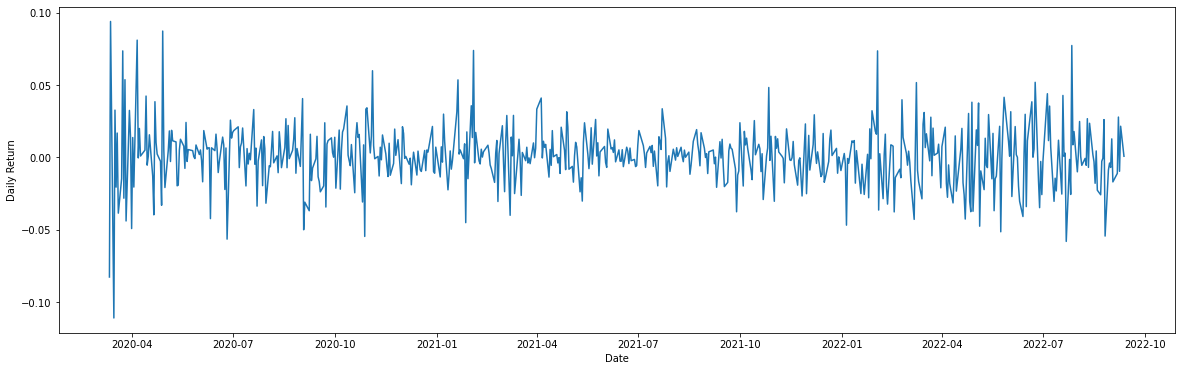

In [26]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data = google_covid, x = 'Date', y = 'Daily Return')

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

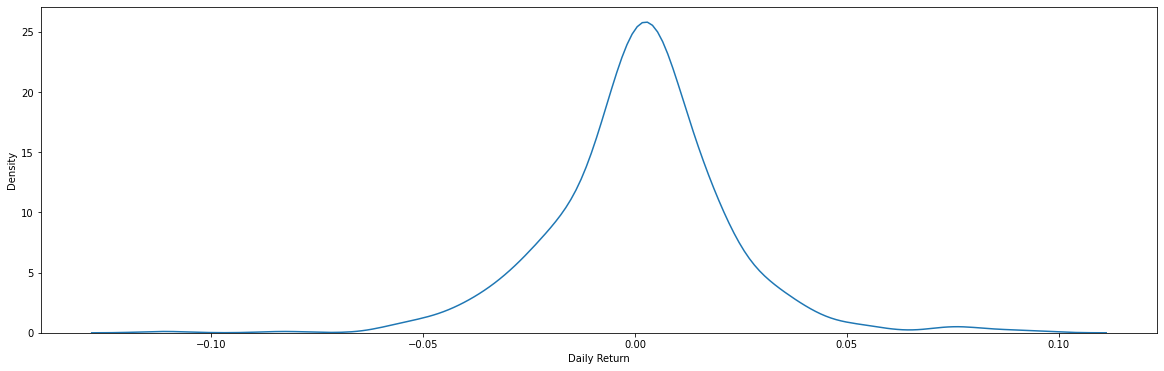

In [27]:
f, ax = plt.subplots(figsize=(20,6))
sns.kdeplot(data = google_covid,x = 'Daily Return')

# Prediction

In [28]:
google_covid = google_covid.to_period(freq = 'B')

In [29]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from sklearn.linear_model import LinearRegression
y = google_covid['Adj Close']
dp = DeterministicProcess(index = google_covid.index, constant = True, order = 3, drop = True)
X = dp.in_sample()
X.head()

,const,trend,trend_squared,trend_cubed
Date,,,,
2020-03-11,1.0,1.0,1.0,1.0
2020-03-12,1.0,2.0,4.0,8.0
2020-03-13,1.0,3.0,9.0,27.0
2020-03-16,1.0,4.0,16.0,64.0
2020-03-17,1.0,5.0,25.0,125.0


In [30]:
model = LinearRegression(fit_intercept = False)
model.fit(X,y)
y_pred = pd.Series(model.predict(X), index = X.index)
y_pred

Date
2020-03-11    62.037391
2020-03-12    62.045634
2020-03-13    62.056084
2020-03-16    62.068731
2020-03-17    62.083565
                ...    
2022-09-06    98.168265
2022-09-07    97.629911
2022-09-08    97.087597
2022-09-09    96.541313
2022-09-12    95.991048
Freq: B, Length: 632, dtype: float64

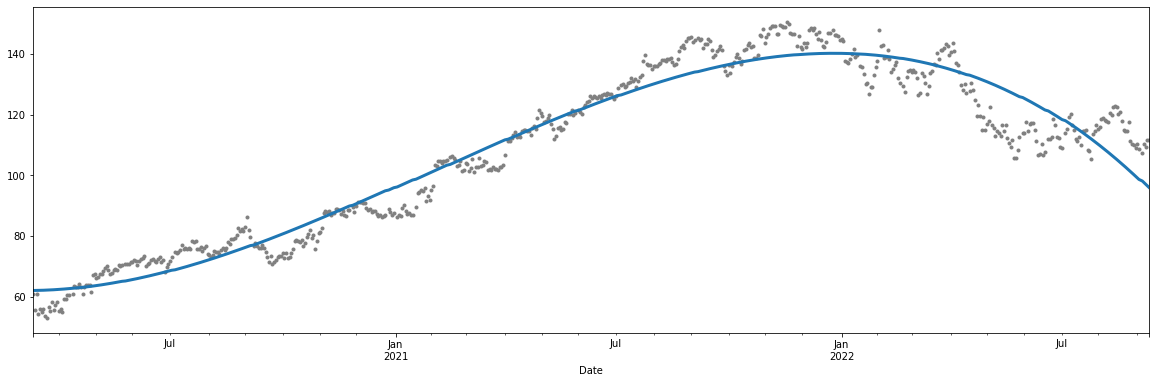

In [31]:

ax = y.plot(style=".", color="0.5", figsize=(20,6))
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [32]:
X = dp.out_of_sample(steps = 30)
y_fore = pd.Series(model.predict(X), index = X.index)
y_fore.head()

2022-09-13    95.436794
2022-09-14    94.878540
2022-09-15    94.316276
2022-09-16    93.749993
2022-09-19    93.179681
Freq: B, dtype: float64

In [33]:
google_covid.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2020-03-11,62.485001,63.048000,59.803501,60.770500,60.770500,52170000,NaN
2020-03-12,56.299999,59.693501,55.665001,55.745499,55.745499,84534000,-0.082688
2020-03-13,58.950001,60.987999,55.857151,60.986500,60.986500,74002000,0.094017
2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000,-0.111008
2020-03-17,54.655499,56.542999,52.800499,55.990002,55.990002,77230000,0.032711


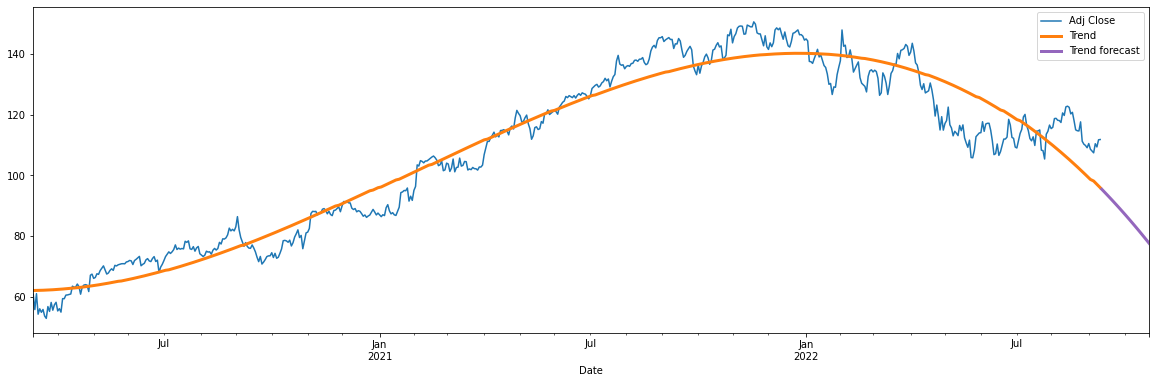

In [34]:
ax = google_covid['Adj Close'].plot(figsize = (20,6))
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label = 'Trend forecast', color = 'C4')
_ = ax.legend()